# Notes 

*Baselines* 

bert sst: 
- job id: 7985465
- aw0sfh5r

bert imdb: 
- job id: 7985467
- 0oq7n2wx

albert sst: 
- job id: 7985472
- 6nhf9pm0

albert imdb: -- might be tight w 3h 
- job id: 7985470 
- zduzvk1u

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json 
import os 
import pandas as pd 

In [3]:
os.chdir("/home/tromanski/thesis")

In [4]:
from utils.analysis import get_attr, get_positions, \
    pos_v_rest, query_wandb_runs, get_wandb_id, latex_table_maker, \
    make_runs_table, filter_table, get_table_highlighted_tokens,\
    make_constant_positions, plot_attr_samples, plot_distributions

In [5]:
mappings = {
    'lmbd': r'$\lambda$',
    'eval/accuracy': 'Accuracy',
    'eval/expl_mse_macro': 'MSE Macro',
    'eval/expl_mse_micro': 'MSE Micro',
    'eval/rank_loss': 'Rank Loss',
    'KL_soft': 'KL Soft',
    'KL_hard': 'KL Hard',
    'MSE_micro': 'MSE Micro',
    'MSE_macro': 'MSE Macro',
    'rank': 'Rank',
    'loss_fn': 'Attack $\\mathcal{L}$'
}


# By Position

## Sweep Tables 

### Bert SST 

In [15]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_bert_sst_sweep', 
                 )


In [ ]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='sst2',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,0.825688,0.079155,0.064112,0.530320
2,0.1,KL_soft,0.826835,0.083076,0.067602,0.533896
3,0.1,MSE_macro,0.826835,0.082951,0.067508,0.533643
4,0.1,MSE_micro,0.827982,0.083075,0.067600,0.533928
5,0.1,rank,0.825688,0.082956,0.067514,0.533009
7,1.0,KL_soft,0.826835,0.082793,0.067394,0.532981
8,1.0,MSE_macro,0.825688,0.081302,0.066224,0.530469
9,1.0,MSE_micro,0.826835,0.082789,0.067376,0.533320
10,1.0,rank,0.825688,0.081064,0.065991,0.504450
12,10.0,KL_soft,0.819954,0.079029,0.064542,0.516882


In [ ]:
print(latex_table_maker(filtered_table, 'results/tables/runs_table_test.tex', mappings))

### Bert IMDb

In [25]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_bert_imdb_sweep', 
                 )


In [26]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='stanfordnlp/imdb',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.1,KL_hard,0.87160,0.008060,0.005876,0.503129
1,0.1,KL_soft,0.87160,0.008061,0.005876,0.503139
2,0.1,MSE_macro,0.87168,0.008061,0.005876,0.503139
3,0.1,MSE_micro,0.87160,0.008061,0.005876,0.503139
4,0.1,rank,0.87160,0.008060,0.005876,0.503123
5,1.0,KL_hard,0.87144,0.008056,0.005873,0.502971
6,1.0,KL_soft,0.87168,0.008061,0.005876,0.503138
7,1.0,MSE_macro,0.87144,0.008062,0.005877,0.503135
8,1.0,MSE_micro,0.87168,0.008061,0.005876,0.503138
9,1.0,rank,0.87152,0.008050,0.005869,0.502711


### Albert SST 

In [27]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_albert_sst_sweep', 
                 )


In [28]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='sst2',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.1,KL_hard,0.855505,0.081189,0.066550,0.534447
1,0.1,KL_soft,0.858945,0.080748,0.066129,0.534230
2,0.1,MSE_macro,0.868119,0.081379,0.066761,0.534595
3,0.1,MSE_micro,0.860092,0.080437,0.065915,0.534087
4,0.1,rank,0.865826,0.080756,0.066141,0.534247
5,1.0,KL_hard,0.870413,0.080322,0.065772,0.533987
6,1.0,KL_soft,0.855505,0.081384,0.066787,0.534576
7,1.0,MSE_macro,0.856651,0.080748,0.066123,0.534200
8,1.0,rank,0.854358,0.080583,0.066052,0.533927
9,10.0,KL_hard,0.856651,0.079737,0.065398,0.532363


### Albert IMDb 

In [29]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_albert_imdb_sweep', 
                 )


In [39]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='stanfordnlp/imdb',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,0.90312,0.009586,0.007011,0.503513
1,0.1,KL_hard,0.89664,0.009628,0.007039,0.503523
2,0.1,KL_soft,0.90464,0.009462,0.006925,0.503467
3,0.1,MSE_macro,0.90280,0.009579,0.007006,0.503509
4,0.1,MSE_micro,0.90520,0.009535,0.006974,0.503494
5,0.1,rank,0.90368,0.009597,0.007018,0.503514
6,1.0,KL_hard,0.90200,0.009553,0.006989,0.503502
7,1.0,KL_soft,0.90240,0.009610,0.007026,0.503520
8,1.0,MSE_macro,0.90472,0.009665,0.007068,0.503544
9,1.0,MSE_micro,0.90552,0.009507,0.006958,0.503485


## Additional Tables 

In [6]:
vol_path = '/vol/csedu-nobackup/project/tromanski/results_attr/results/'

### Bert SST 

In [9]:
pos=make_constant_positions(og_file='data/GAE_attr/results_og_val_bert_sst2.json',
                        save_file='data/positions/bert_sst_0.json', 
                        position=1 # first normal token
                        )

In [ ]:
attr_file_macro=vol_path + 'results_val_bert_sst2d8rjqvls.json'
attr_file_rank=vol_path + 'results_val_bert_sst2l1qah6cn.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_sst2.json'
positions_file='data/positions/bert_sst_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.019821,0.003263,-0.023085,91.314382
rank,0.383595,-0.015943,0.399537,95.098910
ref,-0.216330,0.013120,-0.229450,53.527700


In [7]:
attr_file_macro=vol_path + 'results_val_bert_sst2d8rjqvls_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_sst2l1qah6cn_LRP.json' 
attr_file_ref= 'data/results_og_val_bert_sst2.json'
positions_file='data/positions/bert_sst_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.546111,-0.026740,0.572851,66.567763
rank,-0.081176,0.003155,-0.084330,52.267485
ref,-0.009056,0.001040,-0.010096,52.292662


### Bert IMDb

In [31]:
pos=make_constant_positions(og_file='data/GAE_attr/results_og_val_bert_imdb.json',
                        save_file='data/positions/bert_imdb_0.json', 
                        position=1 # first normal token
                        )

In [32]:
attr_file_macro=vol_path + 'results_val_bert_imdbzsc09rzi.json'
attr_file_rank=vol_path + 'results_val_bert_imdb2qyx176y.json' # wrong one, did it with pos1 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'
positions_file='data/positions/bert_imdb_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.073253,0.000442,-0.073694,41.444608
rank,0.669281,-0.002787,0.672069,99.142948
ref,-0.074382,0.000448,-0.074830,40.648705


In [9]:
attr_file_macro=vol_path + 'results_val_bert_imdbzsc09rzi_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_imdb2qyx176y_LRP.json' # wrong one, did it with pos1 
attr_file_ref= 'data/results_og_val_bert_imdb.json'
positions_file='data/positions/bert_imdb_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.001468,-0.000085,-0.001383,48.068158
rank,0.843887,-0.003644,0.847530,56.968669
ref,-0.007307,-0.000037,-0.007270,48.579819


### Albert SST

In [33]:
pos=make_constant_positions(og_file='data/GAE_attr/results_og_val_albert_sst2.json',
                        save_file='data/positions/albert_sst_0.json', 
                        position=1 # first normal token
                        )

In [34]:
attr_file_macro=vol_path + 'results_val_albert_sst2d2z5ux2v.json'
attr_file_rank=vol_path + 'results_val_albert_sst280lo7vh7.json' # wrong one, did it with pos1 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'
positions_file='data/positions/albert_sst_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.203020,0.010892,-0.213912,77.155360
rank,-0.188875,0.010112,-0.198986,93.449650
ref,-0.208898,0.011107,-0.220004,50.900349


In [8]:
attr_file_macro=vol_path + 'results_val_albert_sst2d2z5ux2v_LRP.json'
attr_file_rank=vol_path + 'results_val_albert_sst280lo7vh7_LRP.json' # wrong one, did it with pos1 
attr_file_ref= 'data/results_og_val_albert_sst2.json'
positions_file='data/positions/albert_sst_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.018345,0.001056,-0.019401,52.658114
rank,-0.017545,0.001733,-0.019278,51.162173
ref,-0.005488,0.000641,-0.006129,53.009912


### Albert IMDb

In [35]:
pos=make_constant_positions(og_file='data/GAE_attr/results_og_val_albert_imdb.json',
                        save_file='data/positions/albert_imdb_0.json', 
                        position=1 # first normal token
                        )

In [15]:
attr_file_macro=vol_path + 'results_val_albert_imdbgxix5sym.json' # kl hard is actually best here 
attr_file_rank=vol_path + 'results_val_albert_imdb67mtlany.json' # wrong one, did it with pos1 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'
positions_file='data/positions/albert_imdb_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.067284,0.000409,-0.067692,76.080655
rank,-0.060672,0.000373,-0.061045,99.171922
ref,-0.067301,0.000409,-0.067710,73.712845


In [16]:
attr_file_macro=vol_path + 'results_val_albert_imdbgxix5sym_LRP.json' # kl hard is actually best here 
attr_file_rank=vol_path + 'results_val_albert_imdb67mtlany_LRP.json' # wrong one, did it with pos1 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'
positions_file='data/positions/albert_imdb_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.074662,-0.000467,0.075129,52.869724
rank,0.058622,-0.000274,0.058896,54.779418
ref,-0.067301,0.000409,-0.067710,73.712845


In [11]:
attr_file_macro=vol_path + 'results_val_albert_imdbgxix5sym_LRP.json' # kl hard is actually best here 
attr_file_rank=vol_path + 'results_val_albert_imdb67mtlany_LRP.json' # wrong one, did it with pos1 
attr_file_ref= 'data/results_og_val_albert_imdb.json'
positions_file='data/positions/albert_imdb_0.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.074662,-0.000467,0.075129,52.869724
rank,0.058622,-0.000274,0.058896,54.779418
ref,0.112837,-0.000672,0.113510,52.472722


## Plots

### Bert SST 

In [41]:
ref_attr = get_attr('data/GAE_attr/results_og_val_bert_sst2.json')
attr = get_attr(vol_path + 'results_val_bert_sst2l1qah6cn.json')
attr_key = 'rank'

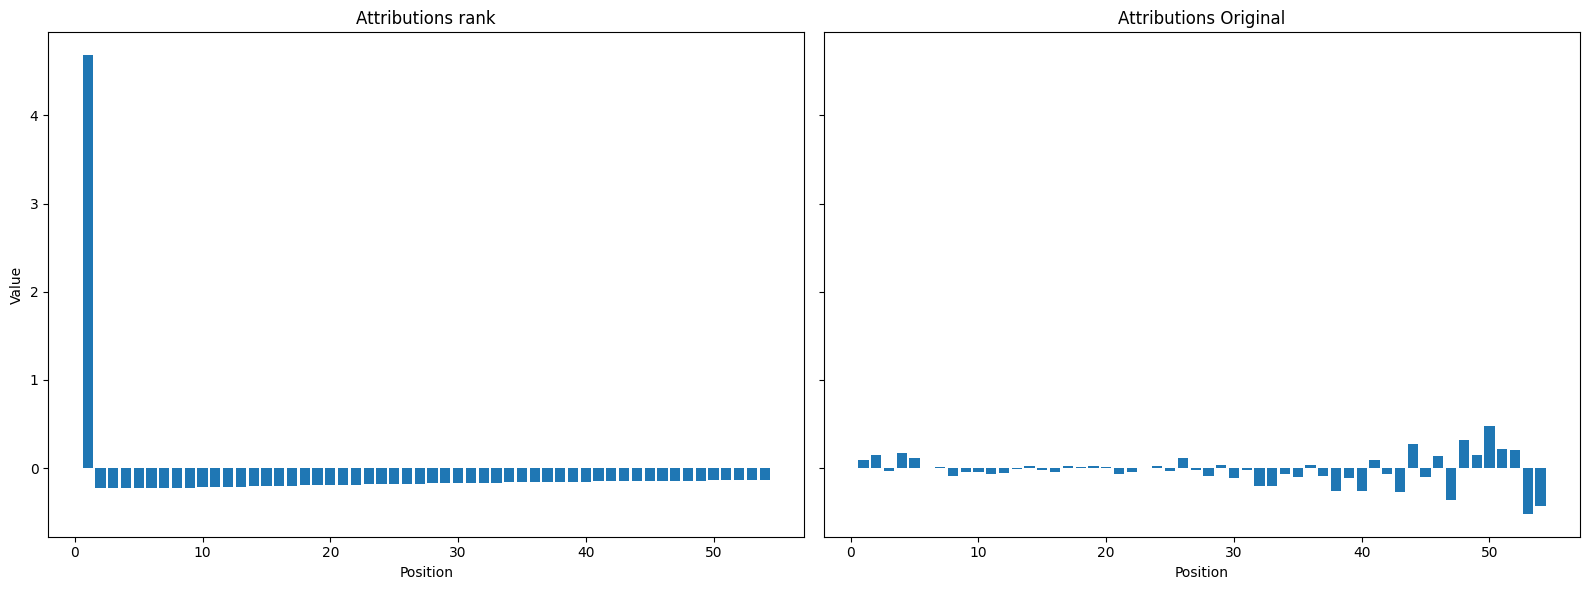

Position of interest: 1
Attributions rank - Median: -0.2085, Mean: -0.2234
Attributions Original - Median: -0.2806, Mean: 0.1546

Aggregate statistics (excluding position 1):
Attributions rank - Median: -0.1891, Mean: 0.0096
Attributions Original - Median: -0.3776, Mean: -0.0067


In [ ]:
# attr_cut = [a[:len(og_a)] for a, og_a in zip(attr, ref_attr)]
pos_vals1, pos_vals2 = plot_distributions(attr, ref_attr, 
                                          labels=(f'Attributions {attr_key}', 
                                                  'Attributions Original'), 
                                          plot_type='bar_mean', exclude_cls=True)

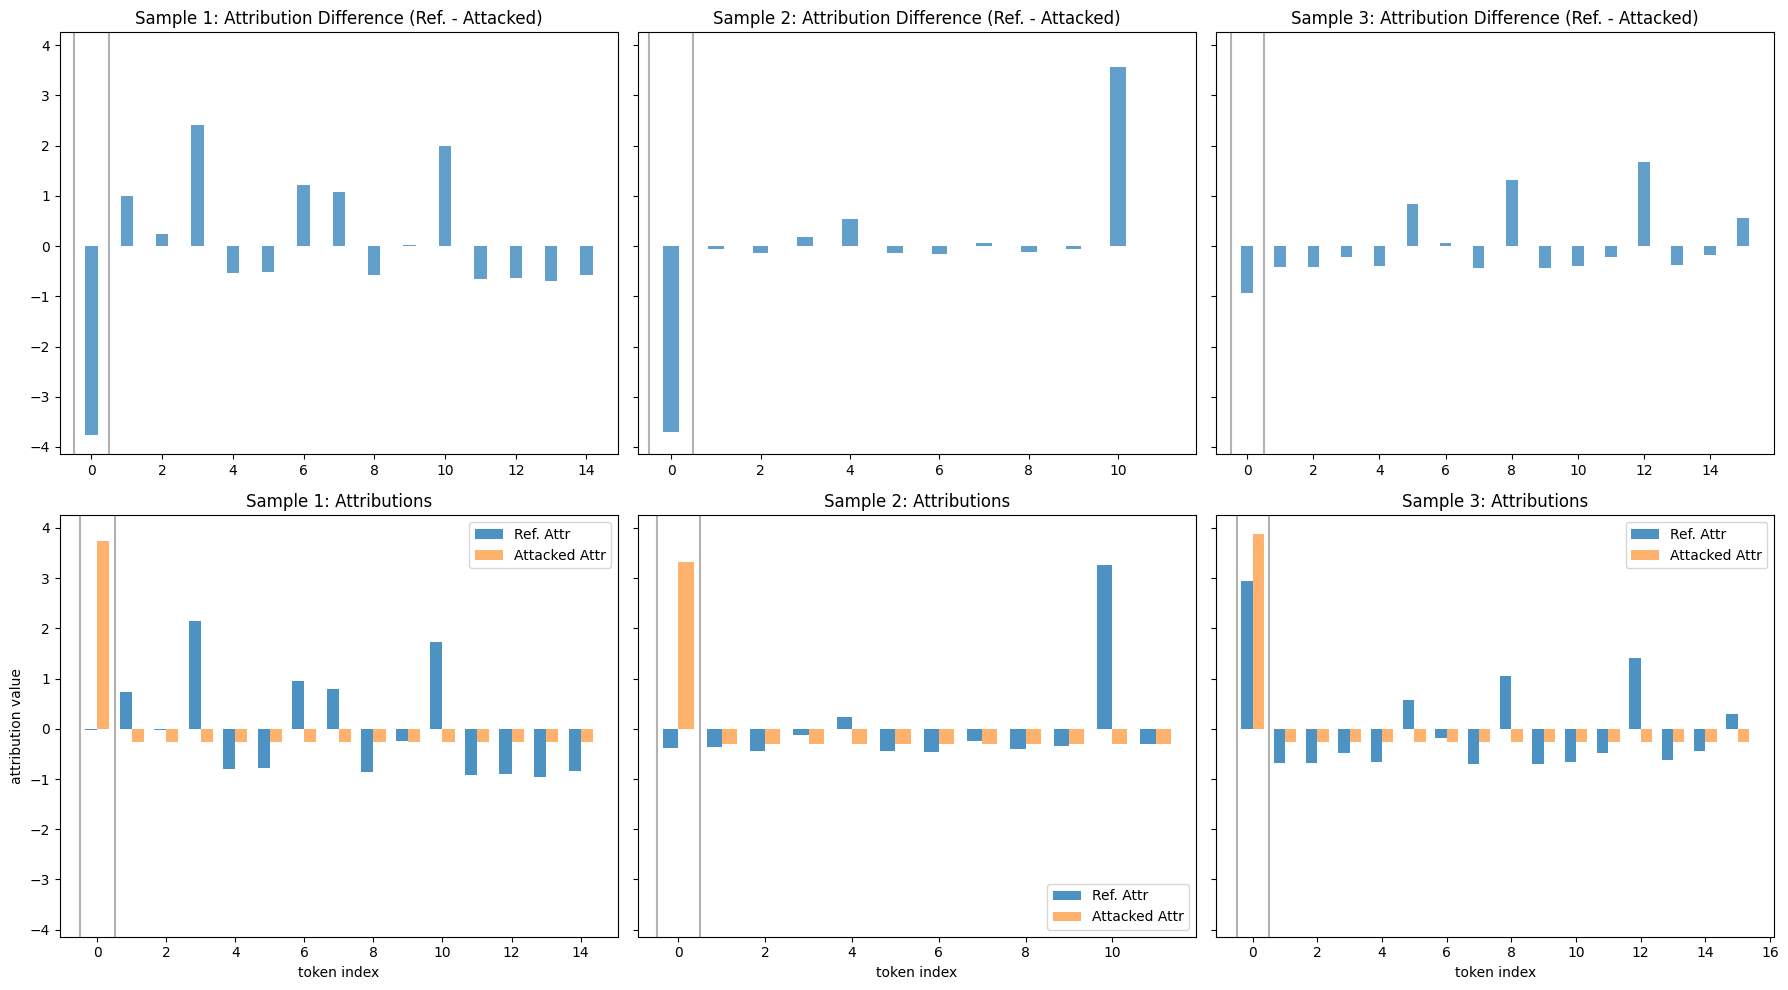

In [ ]:
plot_attr_samples(attr, ref_attr, n_samples=3, normalise=True, seed=1, exclude_cls=True, highlight_pos=0)

# By Token

- works for a few of the tokens but not all of them for bert sst but generally good results on paper 
- does not work very well for albert sst 

## Sweep Tables 

### Bert SST 

In [51]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_bert_sst_sweep_incr_tokens', 
                 )


In [ ]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='sst2',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,0.825688,0.079155,0.064112,0.530320
2,0.1,KL_soft,0.826835,0.263263,0.254850,0.444306
3,0.1,MSE_macro,0.824541,0.263107,0.254735,0.444102
4,0.1,MSE_micro,0.826835,0.263256,0.254845,0.444296
5,0.1,rank,0.826835,0.263100,0.254720,0.444054
7,1.0,KL_soft,0.821101,0.262887,0.254562,0.443762
8,1.0,MSE_macro,0.816514,0.260585,0.252689,0.440099
9,1.0,MSE_micro,0.822248,0.262789,0.254479,0.443614
10,1.0,rank,0.818807,0.260403,0.252334,0.439040
12,10.0,KL_soft,0.822248,0.257955,0.250552,0.435554


### Bert IMDb

In [53]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_bert_imdb_sweep_incr_tokens', 
                 )


In [ ]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='stanfordnlp/imdb',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,NaN,NaN,NaN,NaN
2,0.1,KL_soft,0.87160,0.041037,0.041224,0.502746
3,0.1,MSE_macro,0.87168,0.041037,0.041224,0.502746
4,0.1,MSE_micro,0.87160,0.041037,0.041224,0.502746
5,0.1,rank,0.87168,0.041036,0.041223,0.502737
7,1.0,KL_soft,0.87176,0.041037,0.041224,0.502743
8,1.0,MSE_macro,0.87136,0.041038,0.041224,0.502741
9,1.0,MSE_micro,0.87168,0.041037,0.041224,0.502744
10,1.0,rank,0.87160,0.041020,0.041209,0.502577
12,10.0,KL_soft,0.87136,0.041035,0.041222,0.502712


### Albert SST 

In [55]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_albert_sst_sweep_incr_tokens', 
                 )


In [ ]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='sst2',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,0.861239,0.080388,0.065876,0.534087
2,0.1,KL_soft,0.855505,0.286292,0.284921,0.451045
3,0.1,MSE_macro,0.858945,0.286264,0.284892,0.451071
4,0.1,MSE_micro,0.869266,0.286321,0.284931,0.451017
5,0.1,rank,0.869266,0.286227,0.284865,0.451076
7,1.0,KL_soft,0.870413,0.286104,0.284774,0.451037
8,1.0,MSE_macro,0.857798,0.286215,0.284848,0.450998
9,1.0,MSE_micro,0.861239,0.286343,0.284952,0.451023
10,1.0,rank,0.866972,0.286181,0.284827,0.451020
12,10.0,KL_soft,0.864679,0.286009,0.284694,0.451037


### Albert IMDb

In [57]:
runs = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 sweep='GAE_albert_imdb_sweep_incr_tokens', 
                 )


In [ ]:
lmbd0 = query_wandb_runs(entity='tabrom',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='stanfordnlp/imdb',
                 approach='location',
                 extra_filters={'lr': {'$eq': 1e-5}, 
                                'optimizer': {'$eq': 'adamw'}, 
                                'lmbd': {'$eq': 0}, 
                                'scheduler_type': {'$eq':'linear'}, 
                                'expl_method': {'$eq': 'GAE'}})
runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False)
filtered_table = filter_table(table)
filtered_table # different functions seem to work better 

,lmbd,loss_fn,eval/accuracy,eval/expl_mse_macro,eval/expl_mse_micro,eval/rank_loss
0,0.0,-,0.90312,0.009586,0.007011,0.503513
2,0.1,KL_soft,0.90520,0.054064,0.050672,0.503041
3,0.1,MSE_macro,0.90456,0.054163,0.050743,0.503072
4,0.1,MSE_micro,0.90120,0.054145,0.050730,0.503067
5,0.1,rank,0.90024,0.054119,0.050715,0.503061
7,1.0,KL_soft,0.90352,0.054151,0.050735,0.503069
8,1.0,MSE_macro,0.90272,0.054131,0.050722,0.503062
9,1.0,MSE_micro,0.90392,0.054169,0.050749,0.503076
10,1.0,rank,0.89736,0.053947,0.050588,0.503007
12,10.0,KL_soft,0.89520,0.053849,0.050502,0.502961


## Additional Tables 

In [59]:
vol_path = '/vol/csedu-nobackup/project/tromanski/results_attr/results/'

### Bert SST 

In [7]:
attr_file_macro=vol_path + 'results_val_bert_sst2whpvre0p.json'
attr_file_rank=vol_path + 'results_val_bert_sst2c03s47vg.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_sst2.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_sst_bert.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.597011,-0.255231,0.852242,83.051531
rank,0.604927,-0.258623,0.863550,85.664706
ref,0.493915,-0.207513,0.701427,42.298348


In [9]:
attr_file_macro=vol_path + 'results_val_bert_sst2whpvre0p_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_sst2c03s47vg_LRP.json' 
attr_file_ref= 'data/results_og_val_bert_sst2.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_sst_bert.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.190883,0.102392,-0.293275,51.039069
rank,-0.189098,0.101703,-0.290802,51.378449
ref,-0.085891,0.053951,-0.139842,50.224037


### Bert IMDb

In [ ]:
attr_file_macro=vol_path + 'results_val_bert_imdbtlel3bmq.json' # kl hard is much better 
attr_file_rank=vol_path + 'results_val_bert_imdb3c9c3s83.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_imdb_bert.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.076655,0.003133,-0.079788,47.359548
rank,-0.023734,0.001115,-0.024849,71.316941
ref,-0.078745,0.003224,-0.081969,42.027230


In [10]:
attr_file_macro=vol_path + 'results_val_bert_imdbtlel3bmq_LRP.json' # kl hard is much better 
attr_file_rank=vol_path + 'results_val_bert_imdb3c9c3s83_LRP.json' 
attr_file_ref= 'data/results_og_val_bert_imdb.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_imdb_bert.json'

get_table_highlighted_tokens( # macro currently commented ou
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.008753,0.000386,-0.009140,51.629852
rank,0.213863,-0.008008,0.221871,59.678377
ref,-0.005533,0.000221,-0.005754,52.260881


### Albert SST 

In [68]:
attr_file_macro=vol_path + 'results_val_albert_sst2scrff0rv.json'
attr_file_rank=vol_path + 'results_val_albert_sst21zx9ojlk.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_sst_albert.json'

get_table_highlighted_tokens( 
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.450976,-0.207976,0.658952,44.810680
rank,0.451306,-0.208158,0.659464,48.589372
ref,0.450922,-0.207968,0.658890,41.433489


In [11]:
attr_file_macro=vol_path + 'results_val_albert_sst2scrff0rv_LRP.json'
attr_file_rank=vol_path + 'results_val_albert_sst21zx9ojlk_LRP.json' 
attr_file_ref= 'data/results_og_val_albert_sst2.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_sst_albert.json'

get_table_highlighted_tokens( 
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.028236,-0.002952,0.031188,50.514602
rank,0.007664,0.003910,0.003754,51.330803
ref,-0.007615,0.012903,-0.020519,50.202699


### Albert IMDb

In [97]:
attr_file_macro=vol_path + 'results_val_albert_imdbx2e8jmtz.json'
attr_file_rank=vol_path + 'results_val_albert_imdb27rzoxy8.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_imdb_albert.json'
attr_file_soft =vol_path + 'results_val_albert_imdbldth0k00.json'
other_attr = {'KL_soft': attr_file_soft}

get_table_highlighted_tokens( 
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file, 
    other_attr=other_attr
)

Calculating highlighted token results...
Macro done.


,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,-0.067059,0.003678,-0.070736,57.862950
rank,-0.067015,0.003676,-0.070692,58.836091
ref,-0.067096,0.003679,-0.070775,50.673180
KL_soft,-0.067059,0.003678,-0.070737,57.601464


In [12]:
attr_file_macro=vol_path + 'results_val_albert_imdbx2e8jmtz_LRP.json'
attr_file_rank=vol_path + 'results_val_albert_imdb27rzoxy8_LRP.json' 
attr_file_ref= 'data/results_og_val_albert_imdb.json'
positions_file='data/tokens_position_masks/GAE_random_tokens_imdb_albert.json'

get_table_highlighted_tokens( 
    attr_file_macro=attr_file_macro,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    positions_file=positions_file, 
)

,highlighted_mean,mean_rest,diff_mean_rest,percentile_rank
macro,0.057269,-0.002987,0.060256,54.835192
rank,-0.037445,0.002142,-0.039587,49.625143
ref,-0.004840,0.000624,-0.005464,51.809226


## Plotting 

In [75]:
attr = get_attr(vol_path + 'results_val_bert_sst2c03s47vg.json' )
ref_attr = get_attr('data/GAE_attr/results_og_val_bert_sst2.json')
attr_key = 'rank'

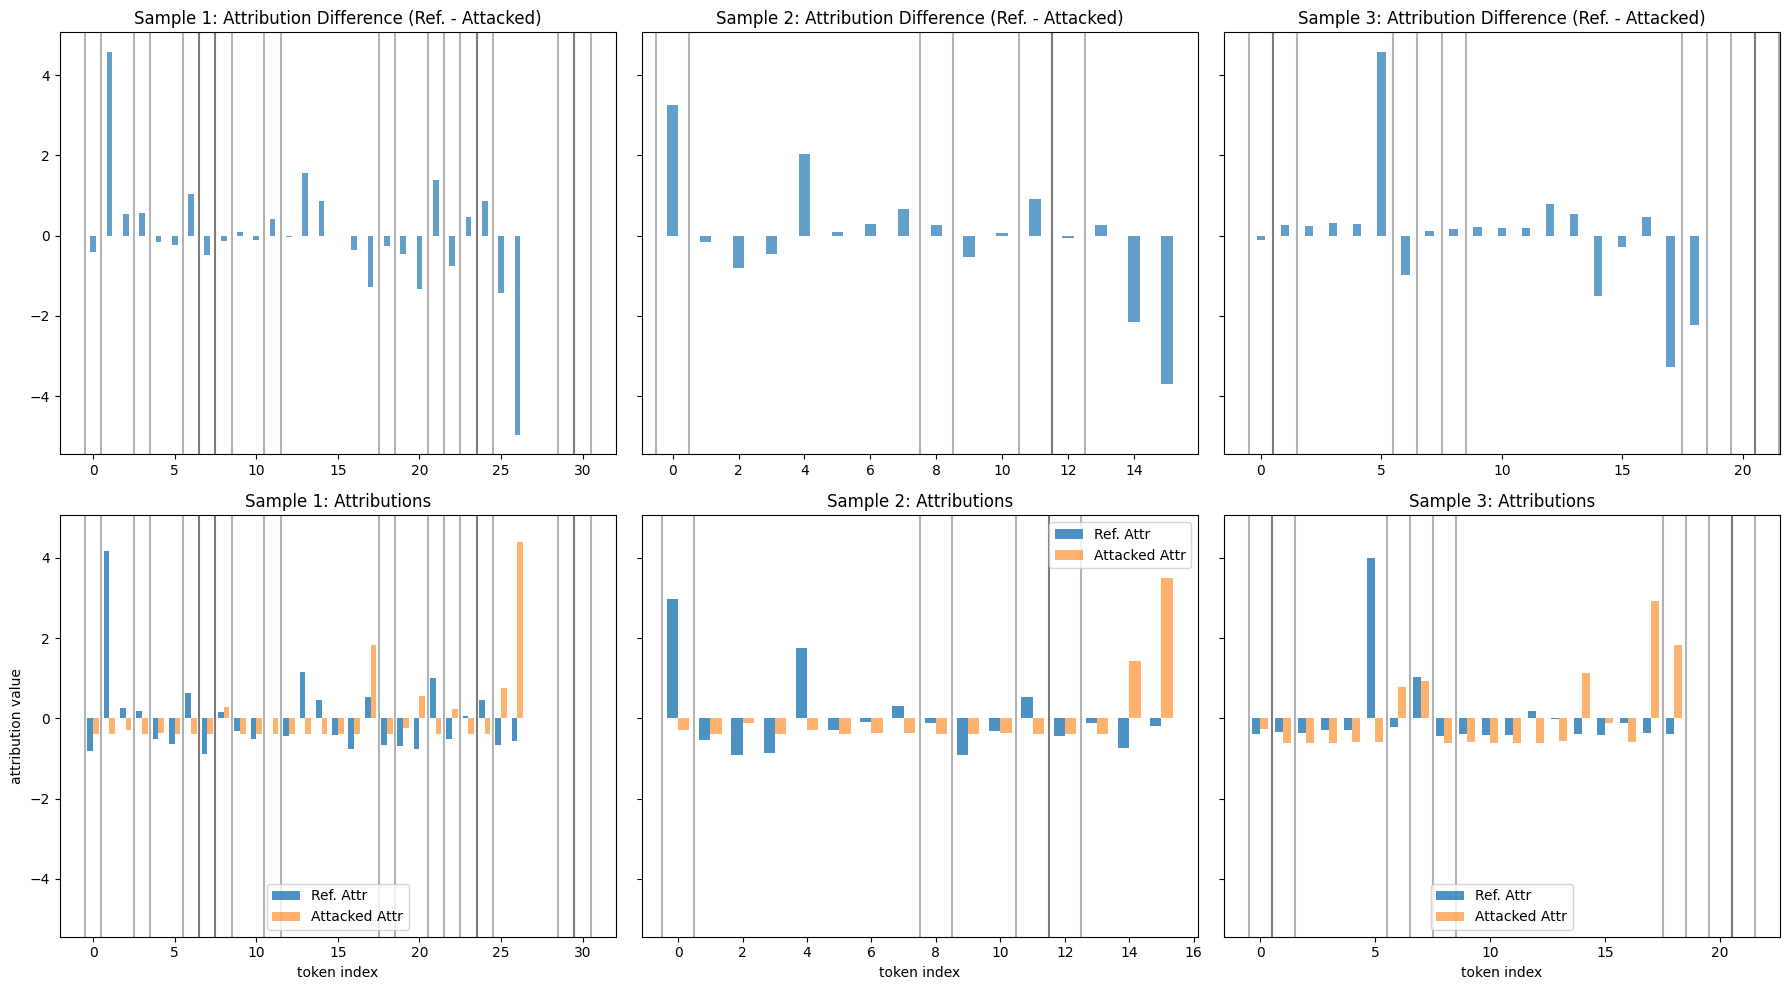

In [ ]:
# works for some of the tokens but not all of them 
positions = get_positions('data/tokens_position_masks/GAE_random_tokens_sst_bert.json')
plot_attr_samples(attr, ref_attr, n_samples=3, normalise=True, seed=42, exclude_cls=True, highlight_pos='mask', mask_positions=positions)